In [53]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline


# Models from Scikit-Learn
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


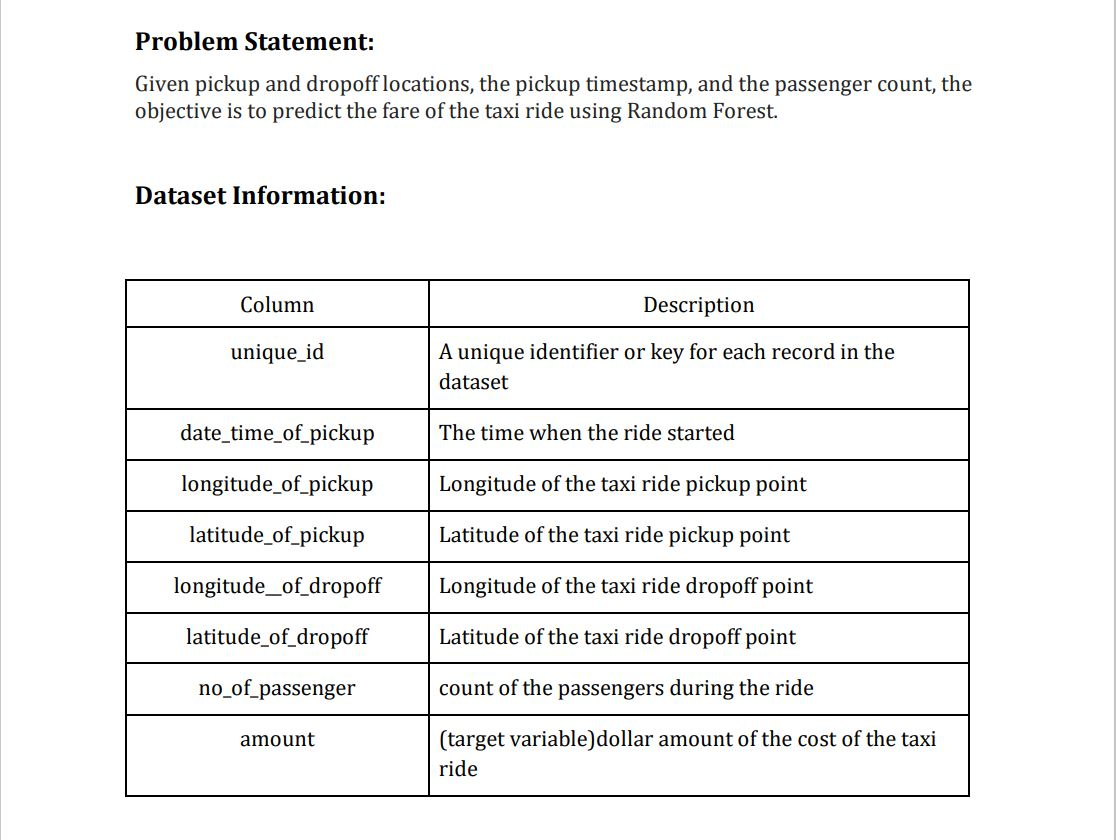

In [54]:
df = pd.read_csv(r"D:\data collection\tax price prediction\Taxi Fare Prediction\Dataset\TaxiFare.csv")

In [55]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


## Feature Engineering

## 1. Removing columns which has 0 as value commanly in all columns

In [57]:
a = df["latitude_of_pickup"].to_dict()

In [58]:
a

{0: 40.721319,
 1: 40.711303,
 2: 40.76127,
 3: 40.733143,
 4: 40.768008,
 5: 40.73163,
 6: 40.751662,
 7: 40.774138,
 8: 40.726713,
 9: 40.733873,
 10: 40.737142,
 11: 0.0,
 12: 40.744712,
 13: 40.728867,
 14: 40.737547,
 15: 0.0,
 16: 40.760465,
 17: 40.73769,
 18: 40.784843,
 19: 40.751902,
 20: 40.747858,
 21: 40.779252,
 22: 40.770505,
 23: 40.747473,
 24: 40.756973,
 25: 40.754437,
 26: 0.0,
 27: 40.76016,
 28: 40.690835,
 29: 40.73776,
 30: 40.752422,
 31: 40.71766663,
 32: 40.773883,
 33: 40.744988,
 34: 40.740785,
 35: 40.73871994,
 36: 40.75644684,
 37: 40.75474,
 38: 40.773617,
 39: 40.759186,
 40: 40.744961,
 41: 40.725514,
 42: 40.76292,
 43: 40.7372,
 44: 40.737095,
 45: 40.758944,
 46: 40.74442,
 47: 40.763577,
 48: 40.756072,
 49: 40.742657,
 50: 40.739765,
 51: 40.772048,
 52: 40.783723,
 53: 40.746212,
 54: 40.751603,
 55: 40.755886,
 56: 40.758853,
 57: 40.727498,
 58: 40.739582,
 59: 40.736011,
 60: 40.74189,
 61: 40.713436,
 62: 40.731677,
 63: 40.7675,
 64: 40.753

In [59]:
##b list contains index of rows that have 0 
b = []
for k,v in a.items():
    if v == 0:
        b.append(k)

       
print(b)    

[11, 15, 26, 124, 192, 233, 273, 357, 376, 387, 472, 498, 540, 542, 568, 660, 728, 799, 872, 881, 887, 958, 960, 964, 966, 1314, 1316, 1397, 1441, 1542, 1561, 1595, 1637, 1681, 1704, 1779, 1783, 1823, 1828, 1846, 2011, 2143, 2228, 2397, 2447, 2448, 2455, 2519, 2521, 2542, 2722, 2747, 2799, 2881, 2885, 2960, 2964, 3008, 3128, 3167, 3168, 3194, 3308, 3357, 3360, 3361, 3374, 3433, 3465, 3507, 3537, 3711, 3760, 3765, 3806, 3830, 3866, 3889, 3891, 3908, 3914, 4047, 4214, 4430, 4455, 4461, 4473, 4513, 4574, 4597, 4600, 4606, 4659, 4740, 4777, 4799, 4858, 4888, 4893, 5123, 5136, 5212, 5228, 5238, 5464, 5465, 5541, 5561, 5586, 5589, 5635, 5664, 5676, 5771, 5779, 5796, 5877, 5960, 5986, 6007, 6024, 6058, 6150, 6177, 6188, 6297, 6302, 6326, 6630, 6646, 6744, 6759, 6761, 6867, 6910, 7004, 7009, 7023, 7078, 7280, 7293, 7316, 7360, 7371, 7410, 7419, 7458, 7539, 7667, 7684, 7695, 7744, 7982, 8063, 8109, 8135, 8245, 8280, 8331, 8406, 8442, 8446, 8483, 8543, 8589, 8605, 8609, 8629, 8645, 8723, 8738, 8

In [60]:
df = df.drop(b , axis =0)

In [61]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


## 2 . Calculating distance based on given latitude and longitude

In [62]:
l1=df["longitude_of_pickup"]
l2=df["longitude_of_dropoff"]
la1=df["latitude_of_pickup"]
la2 =df["latitude_of_dropoff"]

In [63]:
from math import radians, cos, sin, asin, sqrt

In [64]:
dist = []
for lon1 , lon2 ,lat1 , lat2 in zip(l1,l2,la1,la2):

    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
      
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
      
    # calculate the result
    m=c * r
    
    dist.append(m)

In [65]:
dist

[1.030763935049508,
 8.450133595805992,
 1.3895252257697308,
 2.799270239983641,
 1.9991567879963377,
 3.7872390847819912,
 1.5558066593500526,
 4.155444291845812,
 1.253231512725298,
 2.8496267961070503,
 1.374576999593841,
 0.7177674874531168,
 2.0193838271979137,
 1.6714445980753232,
 2.609774493745362,
 1.5119042477189055,
 0.9219517182545394,
 0.39917857039885574,
 1.6868613301697526,
 2.2924697999176953,
 0.9242957326389409,
 1.4039581786018265,
 1.0177730882278786,
 2.531946697193182,
 0.3287708526843157,
 4.0734630904871665,
 0.8081531607887177,
 0.8719132689989956,
 6.7035516761118155,
 9.403295658389682,
 1.381588506597531,
 7.150502806160692,
 12.782055750141017,
 0.806699283426312,
 0.9518008399110728,
 2.3438024765581496,
 3.585990714379401,
 1.6435680593534319,
 5.013935827376097,
 5.7482588406091795,
 5.45687047329047,
 0.9470360672686319,
 2.548615186304444,
 0.9927377363024056,
 0.46185347052060766,
 0.5503272397653778,
 1.6478832232050487,
 2.499315617230865,
 1.01371

In [66]:
Distance = [round(num, 3) for num in dist]

In [67]:
Distance

[1.031,
 8.45,
 1.39,
 2.799,
 1.999,
 3.787,
 1.556,
 4.155,
 1.253,
 2.85,
 1.375,
 0.718,
 2.019,
 1.671,
 2.61,
 1.512,
 0.922,
 0.399,
 1.687,
 2.292,
 0.924,
 1.404,
 1.018,
 2.532,
 0.329,
 4.073,
 0.808,
 0.872,
 6.704,
 9.403,
 1.382,
 7.151,
 12.782,
 0.807,
 0.952,
 2.344,
 3.586,
 1.644,
 5.014,
 5.748,
 5.457,
 0.947,
 2.549,
 0.993,
 0.462,
 0.55,
 1.648,
 2.499,
 1.014,
 2.285,
 0.207,
 11.604,
 5.044,
 9.634,
 1.691,
 6.349,
 1.271,
 0.431,
 1.232,
 0.975,
 1.448,
 2.191,
 1.62,
 1.113,
 3.733,
 3.375,
 0.835,
 0.922,
 0.843,
 1.055,
 1.2,
 5.404,
 3.421,
 1.492,
 12.503,
 2.348,
 1.934,
 1.574,
 0.834,
 1.487,
 5.899,
 2.533,
 1.653,
 5.124,
 2.519,
 1.753,
 0.59,
 3.998,
 2.217,
 1.986,
 1.297,
 2.233,
 3.21,
 1.424,
 1.493,
 3.502,
 1.309,
 2.442,
 1.179,
 4.215,
 6.144,
 0.754,
 0.0,
 4.072,
 3.308,
 2.93,
 0.565,
 2.041,
 2.006,
 7.599,
 1.491,
 2.957,
 1.107,
 4.618,
 0.481,
 8.301,
 1.523,
 3.255,
 0.94,
 2.653,
 9.718,
 1.68,
 5.867,
 2.329,
 1.873,
 1.8,
 1.382

In [68]:
df.insert(7 ,"Distance" ,Distance)

In [69]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,Distance,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.031,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,8.450,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,1.390,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,2.799,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.999,1
...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,4.940,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,0.875,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,2.263,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,0.665,2


In [70]:
dt = df["date_time_of_pickup"]

In [71]:
for i in dt[1:2]:
    print(type(i))

<class 'str'>


In [72]:
#pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [73]:
o1 = df["unique_id"].value_counts().to_dict()

In [74]:
df["unique_id"] = df["unique_id"].map(o1)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49045 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             49045 non-null  int64  
 1   amount                49045 non-null  float64
 2   date_time_of_pickup   49045 non-null  object 
 3   longitude_of_pickup   49045 non-null  float64
 4   latitude_of_pickup    49045 non-null  float64
 5   longitude_of_dropoff  49045 non-null  float64
 6   latitude_of_dropoff   49045 non-null  float64
 7   Distance              49045 non-null  float64
 8   no_of_passenger       49045 non-null  int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 3.7+ MB


In [76]:
df[1:20]

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,Distance,no_of_passenger
1,13,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,8.450,1
2,373,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,1.390,2
3,10,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,2.799,1
4,397,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.999,1
5,7,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,3.787,1
6,373,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1.556,1
7,412,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,4.155,1
8,389,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1.253,1
9,427,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2.850,2
10,10,5.3,2012-04-08 07:30:50 UTC,-73.996335,40.737142,-73.980721,40.733559,1.375,1


## 2. Feature Engineerring on Date_time objects


## Reference :
* https://towardsdatascience.com/machine-learning-with-datetime-feature-engineering-predicting-healthcare-appointment-no-shows-5e4ca3a85f96

In [77]:
dat = df["date_time_of_pickup"]

In [78]:
df["date_time_of_pickup"] = pd.to_datetime(df["date_time_of_pickup"], 
 format = "%Y-%m-%d %H:%M:%S UTC", 
 errors = "coerce")

In [79]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,Distance,no_of_passenger
0,6,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.031,1
1,13,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,8.450,1
2,373,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,1.390,2
3,10,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,2.799,1
4,397,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.999,1
...,...,...,...,...,...,...,...,...,...
49995,10,15.0,2013-06-12 23:25:15,-73.999973,40.748531,-74.016899,40.705993,4.940,1
49996,10,7.5,2015-06-22 17:19:18,-73.984756,40.768211,-73.987366,40.760597,0.875,1
49997,367,6.9,2011-01-30 04:53:00,-74.002698,40.739428,-73.998108,40.759483,2.263,1
49998,368,4.5,2012-11-06 07:09:00,-73.946062,40.777567,-73.953450,40.779687,0.665,2


In [80]:
df["date_time_of_pickup_year"] = df["date_time_of_pickup"].dt.year
df["date_time_of_pickup_month"] = df["date_time_of_pickup"].dt.month
df["date_time_of_pickup_week"] = df["date_time_of_pickup"].dt.week
df["date_time_of_pickup_day"] = df["date_time_of_pickup"].dt.day
df["date_time_of_pickup_hour"] = df["date_time_of_pickup"].dt.hour
df["date_time_of_pickup_minute"] = df["date_time_of_pickup"].dt.minute
df["date_time_of_pickup_dayofweek"] = df["date_time_of_pickup"].dt.dayofweek

<ipython-input-80-d6992ee73c6b>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["date_time_of_pickup_week"] = df["date_time_of_pickup"].dt.week


In [81]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,Distance,no_of_passenger,date_time_of_pickup_year,date_time_of_pickup_month,date_time_of_pickup_week,date_time_of_pickup_day,date_time_of_pickup_hour,date_time_of_pickup_minute,date_time_of_pickup_dayofweek
0,6,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.031,1,2009,6,25,15,17,26,0
1,13,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,8.450,1,2010,1,1,5,16,52,1
2,373,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,1.390,2,2011,8,33,18,0,35,3
3,10,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,2.799,1,2012,4,16,21,4,30,5
4,397,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.999,1,2010,3,10,9,7,51,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,10,15.0,2013-06-12 23:25:15,-73.999973,40.748531,-74.016899,40.705993,4.940,1,2013,6,24,12,23,25,2
49996,10,7.5,2015-06-22 17:19:18,-73.984756,40.768211,-73.987366,40.760597,0.875,1,2015,6,26,22,17,19,0
49997,367,6.9,2011-01-30 04:53:00,-74.002698,40.739428,-73.998108,40.759483,2.263,1,2011,1,4,30,4,53,6
49998,368,4.5,2012-11-06 07:09:00,-73.946062,40.777567,-73.953450,40.779687,0.665,2,2012,11,45,6,7,9,1


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49045 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unique_id                      49045 non-null  int64         
 1   amount                         49045 non-null  float64       
 2   date_time_of_pickup            49045 non-null  datetime64[ns]
 3   longitude_of_pickup            49045 non-null  float64       
 4   latitude_of_pickup             49045 non-null  float64       
 5   longitude_of_dropoff           49045 non-null  float64       
 6   latitude_of_dropoff            49045 non-null  float64       
 7   Distance                       49045 non-null  float64       
 8   no_of_passenger                49045 non-null  int64         
 9   date_time_of_pickup_year       49045 non-null  int64         
 10  date_time_of_pickup_month      49045 non-null  int64         
 11  date_time_of_pi

In [83]:
df = df.drop(["date_time_of_pickup"],axis=1)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49045 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unique_id                      49045 non-null  int64  
 1   amount                         49045 non-null  float64
 2   longitude_of_pickup            49045 non-null  float64
 3   latitude_of_pickup             49045 non-null  float64
 4   longitude_of_dropoff           49045 non-null  float64
 5   latitude_of_dropoff            49045 non-null  float64
 6   Distance                       49045 non-null  float64
 7   no_of_passenger                49045 non-null  int64  
 8   date_time_of_pickup_year       49045 non-null  int64  
 9   date_time_of_pickup_month      49045 non-null  int64  
 10  date_time_of_pickup_week       49045 non-null  int64  
 11  date_time_of_pickup_day        49045 non-null  int64  
 12  date_time_of_pickup_hour       49045 non-null 

# Correlation Map

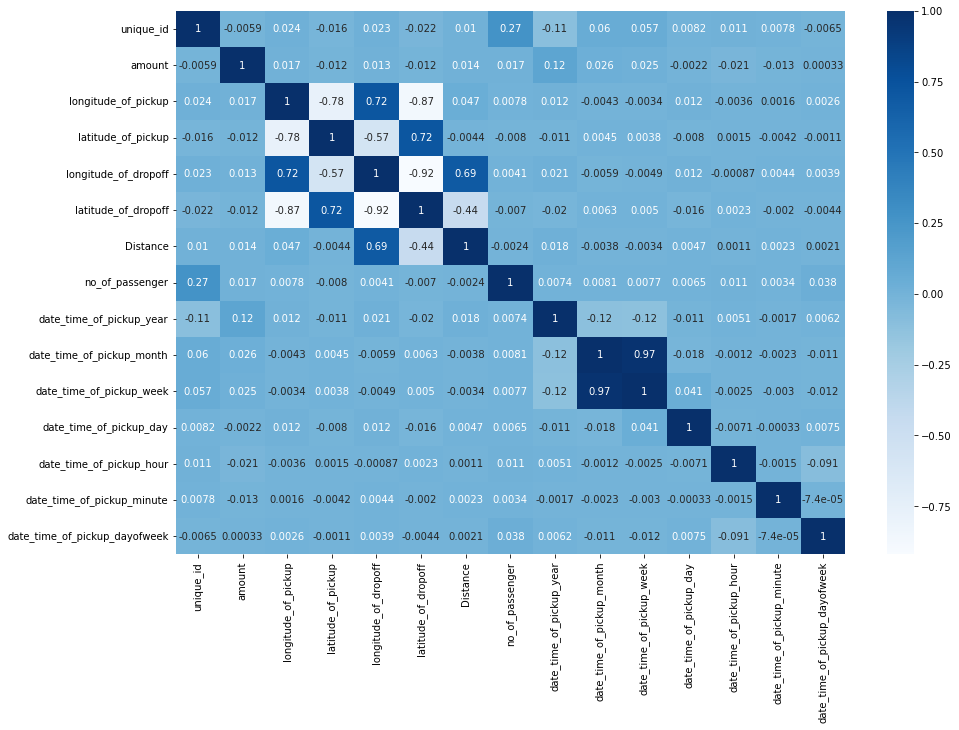

In [85]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

In [86]:
df1 = df[48000:]
df = df[1:48000]

In [87]:
df

,unique_id,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,Distance,no_of_passenger,date_time_of_pickup_year,date_time_of_pickup_month,date_time_of_pickup_week,date_time_of_pickup_day,date_time_of_pickup_hour,date_time_of_pickup_minute,date_time_of_pickup_dayofweek
1,13,16.9,-74.016048,40.711303,-73.979268,40.782004,8.450,1,2010,1,1,5,16,52,1
2,373,5.7,-73.982738,40.761270,-73.991242,40.750562,1.390,2,2011,8,33,18,0,35,3
3,10,7.7,-73.987130,40.733143,-73.991567,40.758092,2.799,1,2012,4,16,21,4,30,5
4,397,5.3,-73.968095,40.768008,-73.956655,40.783762,1.999,1,2010,3,10,9,7,51,1
5,7,12.1,-74.000964,40.731630,-73.972892,40.758233,3.787,1,2011,1,1,6,9,50,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48934,7,9.7,-73.991868,40.749972,-73.980399,40.765023,1.932,1,2011,12,52,26,13,56,0
48935,11,9.5,-73.984072,40.743358,-73.974180,40.763862,2.427,1,2014,9,36,4,23,22,3
48936,5,14.1,-74.012577,40.717075,-73.995367,40.735039,2.468,1,2010,10,43,28,20,1,3
48937,12,7.3,-73.991482,40.749631,-73.997862,40.729454,2.307,1,2010,10,43,29,12,30,4


## Data Modelling

In [88]:
# Models from Scikit-Learn
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [89]:
#split data into X and y
X = df.drop("amount" , axis=1)

y = df["amount"]

In [90]:
X

,unique_id,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,Distance,no_of_passenger,date_time_of_pickup_year,date_time_of_pickup_month,date_time_of_pickup_week,date_time_of_pickup_day,date_time_of_pickup_hour,date_time_of_pickup_minute,date_time_of_pickup_dayofweek
1,13,-74.016048,40.711303,-73.979268,40.782004,8.450,1,2010,1,1,5,16,52,1
2,373,-73.982738,40.761270,-73.991242,40.750562,1.390,2,2011,8,33,18,0,35,3
3,10,-73.987130,40.733143,-73.991567,40.758092,2.799,1,2012,4,16,21,4,30,5
4,397,-73.968095,40.768008,-73.956655,40.783762,1.999,1,2010,3,10,9,7,51,1
5,7,-74.000964,40.731630,-73.972892,40.758233,3.787,1,2011,1,1,6,9,50,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48934,7,-73.991868,40.749972,-73.980399,40.765023,1.932,1,2011,12,52,26,13,56,0
48935,11,-73.984072,40.743358,-73.974180,40.763862,2.427,1,2014,9,36,4,23,22,3
48936,5,-74.012577,40.717075,-73.995367,40.735039,2.468,1,2010,10,43,28,20,1,3
48937,12,-73.991482,40.749631,-73.997862,40.729454,2.307,1,2010,10,43,29,12,30,4


In [91]:
y

1        16.9
2         5.7
3         7.7
4         5.3
5        12.1
         ... 
48934     9.7
48935     9.5
48936    14.1
48937     7.3
48938     6.1
Name: amount, Length: 47999, dtype: float64

In [92]:
np.random.seed(42)

#split data into train & test 
X_train ,X_test,y_train,y_test = train_test_split (X,y,test_size = 0.10)

In [93]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0 )
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=200, random_state=0)

In [94]:
regressor.score(X_test, y_test)

0.808005989750991

In [96]:
y_preds = regressor.predict(X_test)

In [97]:
y_preds

array([ 7.926  ,  8.89585,  4.5045 , ..., 19.1225 ,  6.031  , 22.5225 ])

In [98]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_preds)
print(r2)

0.808005989750991


In [101]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_preds)
mae

1.8692086458333332

In [102]:
# Mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

17.001341916251036

In [108]:
print(f"r2_score is {round(r2*100,2)}")
print(f"Mean absolute error is {round(mae,2)}")
print(f"Mean squared error is {round(mse,2)}")

r2_score is 80.8
Mean absolute error is 1.87
Mean squared error is 17.0


##  Checking  model with sample data

In [103]:
a = df1.drop("amount" , axis=1)

b = df1["amount"]

In [104]:
y_preds1 = regressor.predict(a)

In [105]:
from sklearn.metrics import r2_score
r3 = r2_score(b,y_preds1)
print(r3)

0.8366268218165944


## Hyperparameter tuning with RandomizedSearchCV

## Reference
 
* https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74



This Datast contains nearly 50,000 data it will be take hours to find best paramater

In [110]:
"""



from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


"""

"\n\nfrom sklearn.model_selection import RandomizedSearchCV\n# Number of trees in random forest\nn_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]\n# Number of features to consider at every split\nmax_features = ['auto', 'sqrt']\n# Maximum number of levels in tree\nmax_depth = [int(x) for x in np.linspace(10, 110, num = 11)]\nmax_depth.append(None)\n# Minimum number of samples required to split a node\nmin_samples_split = [2, 5, 10]\n# Minimum number of samples required at each leaf node\nmin_samples_leaf = [1, 2, 4]\n# Method of selecting samples for training each tree\nbootstrap = [True, False]\n# Create the random grid\nrandom_grid = {'n_estimators': n_estimators,\n               'max_features': max_features,\n               'max_depth': max_depth,\n               'min_samples_split': min_samples_split,\n               'min_samples_leaf': min_samples_leaf,\n               'bootstrap': bootstrap}\nprint(random_grid)\n\n\n"

In [112]:
"""

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)


"""

'\n\n# Use the random grid to search for best hyperparameters\n# First create the base model to tune\nrf = RandomForestRegressor()\n# Random search of parameters, using 3 fold cross validation, \n# search across 100 different combinations, and use all available cores\nrf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)\n# Fit the random search model\nrf_random.fit(X_train, y_train)\n\n\n'

In [113]:
##Run below code to get best parameter 

# rf_random.best_params_